## Проект по иследованию интернет-магазина "Стримчик" :


#### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

#### Описание данных

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### Этапы иследования

1. Изучение общей информации

2. Подготовка данных к иледованию(выявления аномалии,пропусков,дубликатов)

3. Исправить аномалии, удалить дубликаты(при возможности), обработать проуски(при возможности)

4. Провести исследовательский анализ данных и выбрать актуальный период для иследования

5. Составить портрет пользователя каждого региона

6. Проверить гипотезы

7. Написать общий вывод

### Изучение общей информации 

Импортирум библиотеки

In [1]:
#Импортиреум все библиотеки, каторые могут понадобиться при выполнении проекта
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from math import factorial, exp
from math import sqrt
from random import randint
from scipy import stats as st
from scipy.stats import binom, poisson

Сохраняем файл в датафрейме

In [2]:
#сохраняем файл в датафрейме data_games
data_games = pd.read_csv('/datasets/games.csv')

Изучаем данные

In [3]:
#Выводим на экран первые 10 строк
data_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#Выводим на экран последние 10 строк
data_games.head(10).tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


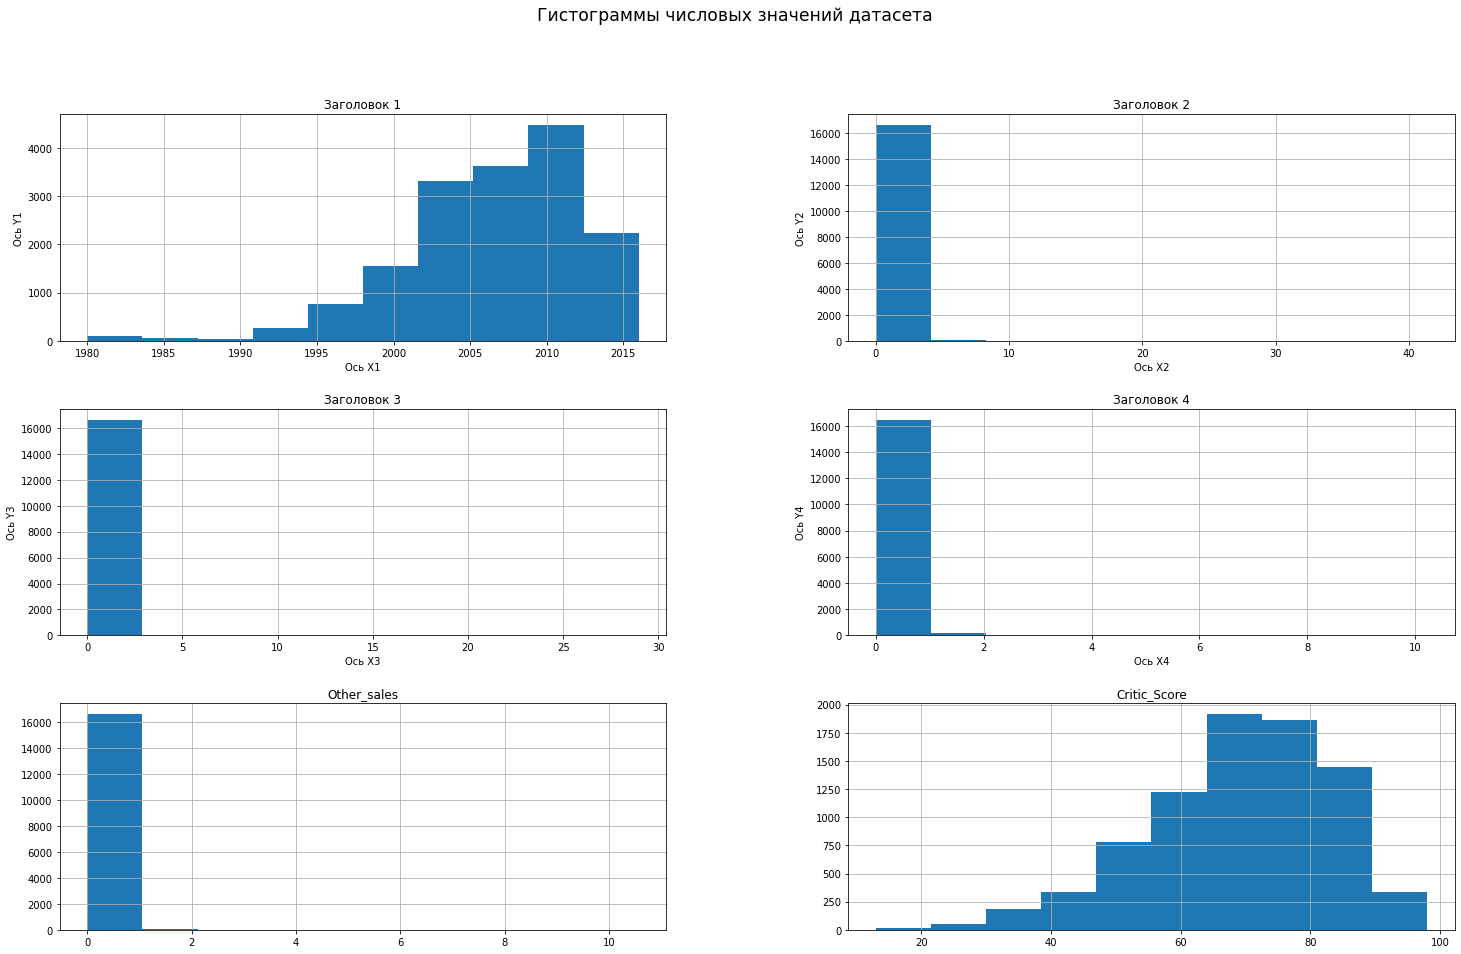

In [6]:
axes = data_games.hist(figsize = (25,15))
axes[0,0].set_title('Заголовок 1')
axes[0,0].set_xlabel('Ось Х1')
axes[0,0].set_ylabel('Ось Y1')

axes[0,1].set_title('Заголовок 2')
axes[0,1].set_xlabel('Ось Х2')
axes[0,1].set_ylabel('Ось Y2')

axes[1,0].set_title('Заголовок 3')
axes[1,0].set_xlabel('Ось Х3')
axes[1,0].set_ylabel('Ось Y3')

axes[1,1].set_title('Заголовок 4')
axes[1,1].set_xlabel('Ось Х4')
axes[1,1].set_ylabel('Ось Y4')
# И так далее по всем гистограммам

plt.suptitle('Гистограммы числовых значений датасета', ha='center', fontsize='xx-large')
plt.show()

In [7]:
#Выводим на экран общие статистические данные 
data_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [8]:
#Выводим на экран общую информацию датафрейма
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
#Выводим на экран информацию о пропусках
data_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [10]:
#Проверяем пропуски в столбце name
name_data = data_games[data_games['Name'].isna()]
name_data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
#Проверяем пропуски в столбце Year_of_Release
year_data = data_games[data_games['Year_of_Release'].isna()]
year_data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
#Проверяем пропуски в столбце Genre
genre_data = data_games[data_games['Genre'].isna()]
genre_data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


### Предоброботка данных

In [13]:
#Приводим название колонок в нижний ркгистр
data_games.columns = data_games.columns.str.lower()
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [14]:
#Удаляем пропуски в колонке name
data_games.dropna(subset=['name'], inplace=True)

Удалила пропуски в колонке 'name'. Пропуски составляют 0.011% от всей информации. Думаю это незначительные данные для этого столбца.

In [15]:
#Проверяем количество уникальных значений в колонке data_games
data_games['name'].value_counts()

Need for Speed: Most Wanted          12
LEGO Marvel Super Heroes              9
Ratatouille                           9
Madden NFL 07                         9
FIFA 14                               9
                                     ..
Fighter Maker 2                       1
Empire Earth II                       1
Samurai Shodown V                     1
Surf Riders                           1
Untold Legends: The Warriors Code     1
Name: name, Length: 11559, dtype: int64

Ещё раз проверим Названия игр по платформам. Посмотрим есть ли дубликаты. Это должны быть игры, каторые вышли в тот же год с одинаковой платформой.

In [16]:
#Выводим на экран список игр с повторяющимся названиями на одной и той же платформе
data_games[data_games.duplicated(subset=['name', 'platform'], keep=False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


Madden NFL 13 думаю это и есть дубликат. можно удалить эту строку, В нём нет актуальной информации.Оставим строку с индексом 604 и удалим с индексом 16230. Может быть это связано с датой выпуска игры в разных странах.

Даты выхода Madden NFL 13 в США-PlayStation 3 → игра вышла 28 августа 2012

Даты выхода Madden NFL 13 в Европе-PlayStation 3 → игра вышла 31 августа 2012

In [17]:
#Проверяем количество строк до удаления дубликата
data_games.shape

(16713, 11)

In [18]:
#Удаляем дубликат и проверяем количество строк после
data_games = data_games.drop(index=[16230]).reset_index(drop=True)
data_games.shape

(16712, 11)

Есть аномалии в колонке 'platform'. Вместо названии платформа указан 2600. Может быть это Atari 2600 Jr.Годы выпусков таких игр от 1980 до 1982.Пока не будем трогать эти данные.

В колонке 'year_of_release' есть пропуски. Они составляют 1.63%. Думаю удаление этих пропусков не будет мешать дальнейшему иследованию. Пока не ясно закономерность этих пропусков.

In [19]:
#Удаляем строки с пропускам и меняем ти данных на datetime
data_games.dropna(subset=['year_of_release'], inplace=True)
#data_games['year_of_release'] = pd.to_datetime(data_games['year_of_release'], format=('%Y'))
data_games['year_of_release'] = data_games['year_of_release'].astype('int')

Есть 2 пропуска в колонке 'genre'. Так же удаляем

In [20]:
#Удаляем пропуск в колонке 'genre'
data_games.dropna(subset=['genre'], inplace=True)

In [21]:
data_games['critic_score'].describe()

count    7982.000000
mean       68.992608
std        13.920049
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [22]:
data_games['user_score'].describe()

count     9838
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

В колонках na_sales,eu_sales,jp_sales,other_sales  нет пропусков, но есть игры, у которых нет продаж. Пока что не будем трогать эти данные.

В колонке 'user_score' поменяем тип данных из object на цифры.Пропуски есть,в этих же строках отсуствуют данные по 'critic_score','rating' скорее всего есть какя то закономерность,но пока не будем их трогать. Абривиатура tbd(To Be Determined) означает будет определено.Заполним, как без информации(nan).

In [23]:
# Комментарий ревьюера 2
data_games.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [24]:
#Меняем тип данных из object  на цифры
data_games['user_score'] = pd.to_numeric(data_games['user_score'], errors='coerce')

In [25]:
# Комментарий ревьюера 2
data_games.user_score.unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [26]:
#Заменим пропуски в столбце user_score
data_games.loc[data_games['user_score'] == 'tbd','user_score'] = np.nan

В рейтинге ESRB есть аббревиату́ра K-A  это игры, содержащие контент, подходящий для широкой аудитории. Этот рейтинг использовался до 1998 года, тогда он был переименован в E. А пропуски пока оставим так,ка есть.

In [27]:
#Выводим на экран все уникальные значения rating
data_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [28]:
#Заменим пропуски в столбце rating на RP 
data_games.loc[data_games['rating'].isna(), 'rating'] = 'RP'

«EC» («Early childhood») — «Для детей младшего возраста».Игра подходит для детей от 3 лет и старше

«E» («Everyone») — «Для всех».Для возрастной категории от 6 лет и старше

«E10+» («Everyone 10 and older») — «Для всех старше 10 лет»

«T» («Teen») — «Подросткам».Игра подходит для лиц от 13 лет и старше.

«M» («Mature») — «От 17 лет»

«AO» («Adults Only 18+») — «Только для взрослых»

«RP» («Rating Pending»") — «Рейтинг ожидается»

Перепроверим данные в датафрейме

In [29]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16711
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [30]:
data_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Создадим ещё одну колонку с общей суммой продажи во всех регионах.

In [31]:
#Добавляем колонку general_sales с общей суммой продажи во всех регионах.
data_games['general_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']
data_games.sort_values(by='general_sales',ascending=False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


### Вывод

Изучили данные

1. Название колонок были написаны заглавными буквами, привели к нижнему регистру

2. Были неправильные типы данных в столбцах year_of_release и user_score, из object на float

3. Нашли пропуски в столбцах name,year_of_release,genre,critic_score,user_score,rating. В name,year_of_release и genre удалили пропуски.По скольку они состовляли небольшую процентность от общих строк. А в остальных случаях оставили так,как есть. Между пропусками user_score и critic_score есть взоимосвязь. Удалить эти строки нельзя их очень много. А заполнить средним скорее всего данные будут искажены. В rating  тоже не трогали пропуски.

4. Аббревиатура TBD(To Be Determined) означает будет определено.Заполнили, как без информации(nan).

5. В рейтинге ESRB есть аббревиату́ра K-A, это игры, содержащие контент, подходящий для широкой аудитории. Этот рейтинг использовался до 1998 года, тогда он был переименован в E. 

6. Пропуски в колонке рейтинг скорее всего связано с тем что эти игры либо вышли до того, как начили обозначить по категориям ESRB или эти игры вышли в Японии. По скольку рейтинг ESRB официально ограничена Канадой, США и Мексикой.Поменяли эти пропуски на RP

7. В жанрах пропуски в двух позициях(индекс - 659,14244), это и пропуск и дубликат. В одной строке записана информайия с продажой в Европе,в США и в остальных регионах, в другой строке написано продажа в Японии.

8. Пропуски в колонке год выпуска там где спортивные игры, год написан месте с названием, А в остальных случаях, скорее всего нет информации о годе выпуска.

In [32]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = data_games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  general_sales    16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

ESRB (Entertainment Software Rating Board) — неправительственную организацию, которая занялась регулированием компьютерных игр и их рекламных кампаний, а также обеспечением конфиденциальности в интернете в рамках собственной системы возрастных рейтингов. Стоит отметить, что деятельность ESRB официально ограничена Канадой, США и Мексикой. Врейтингк ESRB  есть аббревиатура  RP («Rating Pending»)— «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официального релиза.

## Исследовательский анализ

### Посмотреть, сколько игр выпускалось в разные годы.

In [34]:
#Создаём нвый датафрейм с общим кол. игр по годам
year_release_count = pd.pivot_table(data_games,index="year_of_release", values="name",aggfunc=('count'))
year_release_count.sort_values(by='name', ascending=False)

,name
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


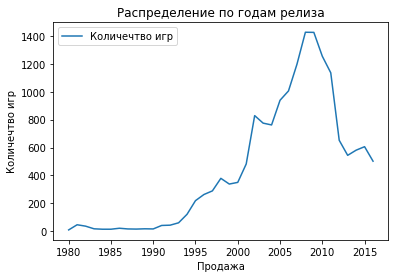

In [35]:
#строим график по этим данным
year_release_count.plot().legend(['Количечтво игр'])
plt.ylabel ('Количечтво игр')
plt.xlabel ('Продажа')
plt.title('Распределение по годам релиза');


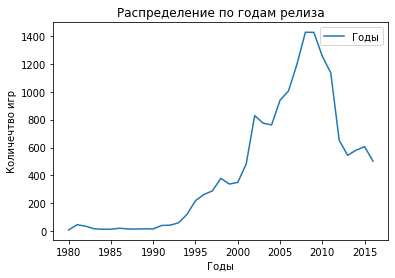

In [36]:
# Комментарий ревьюера 2
year_release_count.plot().legend(['Годы'])
plt.ylabel ('Количечтво игр')
plt.xlabel ('Годы')
plt.title('Распределение по годам релиза');


Вывод

По данным с 1980 ого до 1990 ого года мировом рынке игр был кризис и осноная монополия ввела Япония. после 1994ого года, когда впервы вышел playstation 1, рынок игр начал рости. В 1994 году приняли рейтинг ESRB. С 2000 года начинали выпускать больше игр и был рост продаж по играм.Спад продаж тоже обусловлена быстрым технологическим прорывом.Что бы игра продавалось, нужно что бы он соответствовал всем требованиям.

### Выбераем платформы с наибольшими суммарными продажами и построем распределение по годам.

In [37]:
#Создаём новый датафрейм с наибольшими суммарными продажами платформ
platform_sales_pivot = pd.pivot_table(data_games, index=['platform'], values='general_sales', aggfunc='sum')
platform_sales_pivot.sort_values(by='general_sales',ascending=False)

,general_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


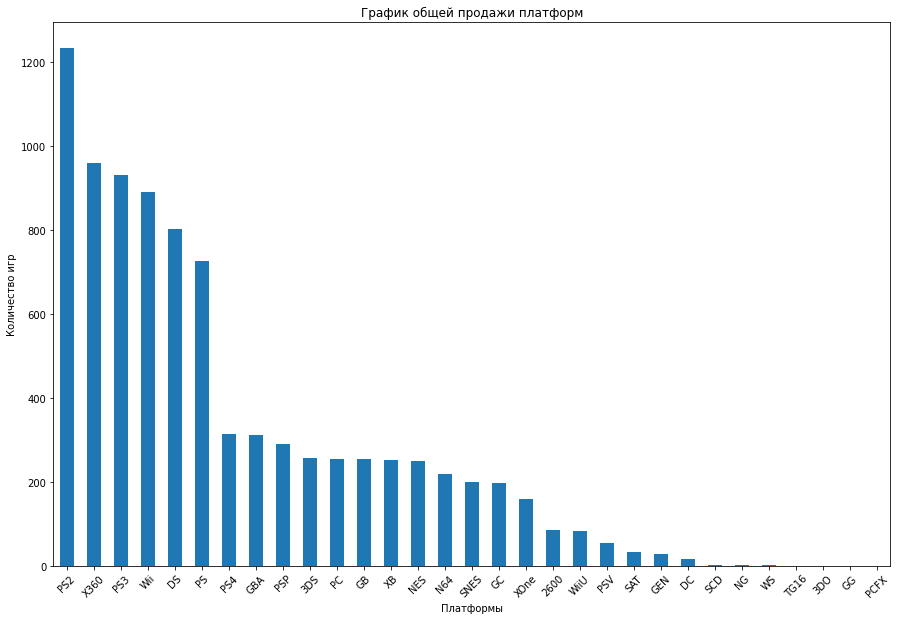

In [38]:
#Визуализируем данные с помощю графика
platform_sales_pivot.sort_values(by='general_sales',ascending=False).plot(kind='bar',figsize=(15,10), legend=False, rot=('45'))
plt.xlabel('Платформы')
plt.ylabel('Количество игр')
plt.title('График общей продажи платформ');

Вывод

Самая большая продоваемоть у PS2. Но при расчётах не будем исключать PS4,потому что релиз этой платформы было 2013 году. Ещё один фактор Sony Corp считается одним из гиантов в рынке игровых приставок. Для расчётов будем использовать топ 5 и плю PS4. 

In [39]:
#Создаём  новый датафрейм по продаже платформам
platform_top_seven = platform_sales_pivot.sort_values(by='general_sales',ascending=False).head(7).reset_index()
platform_top_seven = platform_top_seven['platform'].unique()
platform_top_seven

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4'], dtype=object)

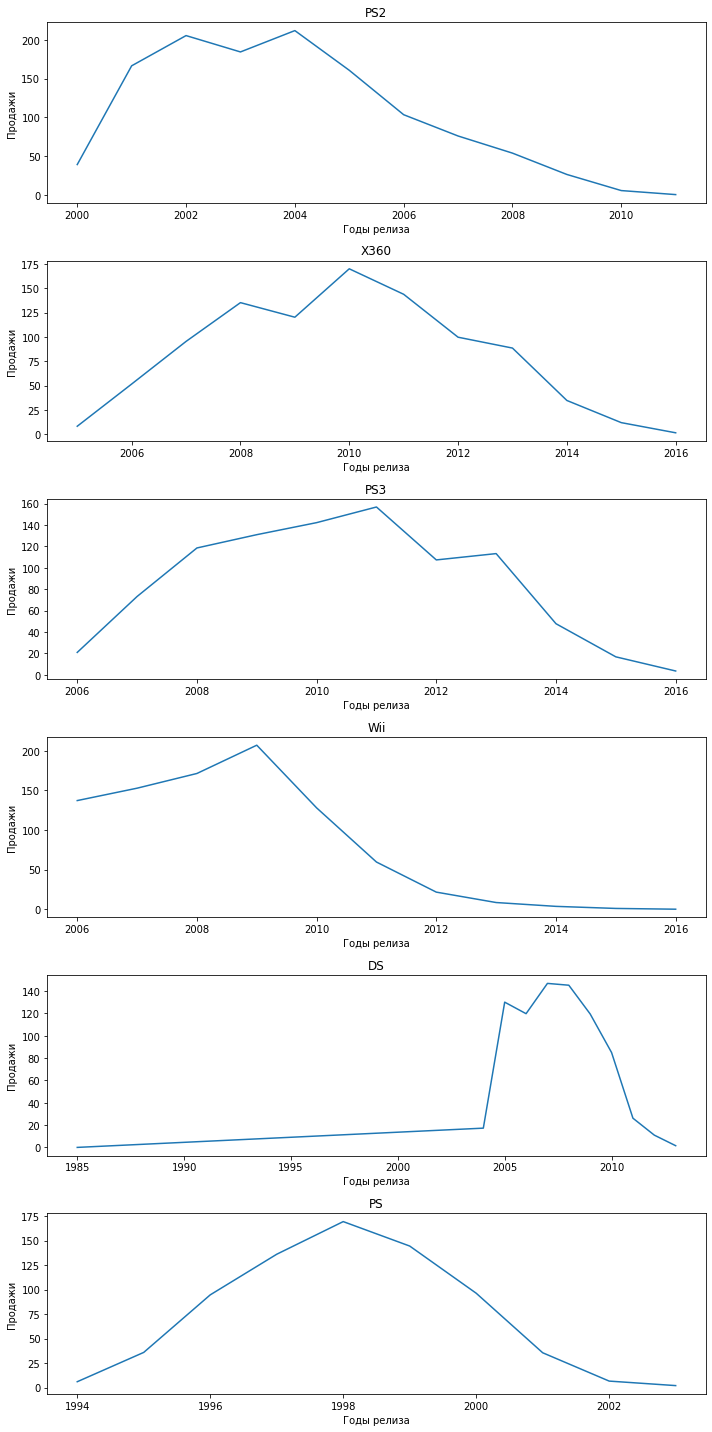

In [40]:
#Создаём графики по этим данным
platforms = list(platform_top_seven)
fig, axs = plt.subplots(6, len(platforms) // 6)
axs = axs.flatten()

num = 0
for platform, ax in zip(platforms, axs):
     ((data_games[data_games["platform"]==platform]
            .pivot_table(index='year_of_release', values='general_sales', aggfunc='sum')
            .sort_values('year_of_release', ascending=False))['general_sales']
                .plot(ax=ax, figsize=(10,20), title=platform)
                .set(xlabel='Годы релиза', ylabel='Продажи'))
   
    
plt.tight_layout()
plt.show()

Nintendo DS (яп. ニンテンドーDS Нинтэндо: DS, сокращённо NDS либо DS) — следующее поколение карманных игровых консолей компании Nintendo после Game Boy Advance SP. Консоль была выпущена в 2004 году в Канаде, США и Японии.

Вывод

По этим данным видим что период продоваймость приставок примерно от 8 до 12 месяцев. Если взять к примеру PS то его продоваемость 5-6 лет до cледуюшего релиза новой PS.

PS-1995

PS2-2002

PS3-2006

PS4-2013


### Посчитаем актуальным периодом после 2012 ого года. Взяв за основу то, что раскрутка игр длится от 2х до 4 лет.Игры выпускаются не так часто.Это связано стребованиями(графика, возможности и т.д.)

In [41]:
#Создаём датафрейм с актуальным периодом
act_data = data_games.query('year_of_release > 2012')
act_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  general_sales    2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


In [42]:
act_data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1242
user_score         1041
rating                0
general_sales         0
dtype: int64

In [43]:
act_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,general_sales
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,991.000000,1192.000000,2233.000000
mean,2014.477385,0.196019,0.175652,0.063045,0.053726,72.023209,6.584564,0.488442
std,1.089439,0.547730,0.512451,0.233997,0.165693,12.841318,1.610413,1.235226
min,2013.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.030000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,74.000000,7.000000,0.110000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,81.000000,7.800000,0.400000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


In [44]:
#Создаём новый датафрей  по продоваемости топ 10 платформ за актуальный период
top_platform_sales = pd.pivot_table(act_data,index=['platform','year_of_release'], values='general_sales', aggfunc='sum')
top_platform_sales

general_sales
platform year_of_release               
3DS      2013                     56.57
         2014                     43.76
         2015                     27.78
         2016                     15.14
DS       2013                      1.54
PC       2013                     12.38
         2014                     13.28
         2015                      8.52
         2016                      5.25
PS3      2013                    113.25
         2014                     47.76
         2015                     16.82
         2016                      3.60
PS4      2013                     25.99
         2014                    100.00
         2015                    118.90
         2016                     69.25
PSP      2013                      3.14
         2014                      0.24
         2015                      0.12
PSV      2013                     10.59
         2014                     11.90
         2015                      6.25
         2016                      4.25
Wii      2013                      8.59
         2014                      3.75
         2015                      1.14
         2016                      0.18
WiiU     2013                     21.65
         2014                     22.03
         2015                     16.35
         2016                      4.60
X360     2013                     88.58
         2014                     34.74
         2015                     11.96
         2016                      1.52
XOne     2013                     18.96
         2014                     54.07
         2015                     60.14
         2016                     26.15

In [45]:
#считаем суммарную продажу  кажой платформы за актуальный период
pd.pivot_table(act_data, index='platform', values='general_sales',
               aggfunc='sum').sort_values(by='general_sales',ascending=False)

,general_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


In [46]:
act_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,general_sales
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,991.000000,1192.000000,2233.000000
mean,2014.477385,0.196019,0.175652,0.063045,0.053726,72.023209,6.584564,0.488442
std,1.089439,0.547730,0.512451,0.233997,0.165693,12.841318,1.610413,1.235226
min,2013.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.030000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,74.000000,7.000000,0.110000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,81.000000,7.800000,0.400000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


In [47]:
top_platform_sales.describe()

,general_sales
count,40.000000
mean,27.267250
std,32.127005
min,0.120000
25%,4.512500
50%,14.210000
75%,36.995000
max,118.900000


In [48]:
act_data_ps4 = act_data.query('platform=="PS4"')
act_data_ps4.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,general_sales
count,392.000000,392.000000,392.000000,392.000000,392.000000,252.000000,257.000000,392.000000
mean,2015.145408,0.277398,0.359923,0.040714,0.123342,72.091270,6.748249,0.801378
std,0.868181,0.583723,0.810843,0.069101,0.254825,12.485992,1.459481,1.609456
min,2013.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.500000,0.010000
25%,2015.000000,0.007500,0.000000,0.000000,0.010000,66.000000,6.100000,0.060000
50%,2015.000000,0.060000,0.080000,0.010000,0.030000,73.000000,7.000000,0.200000
75%,2016.000000,0.260000,0.300000,0.050000,0.110000,80.000000,7.800000,0.730000
max,2016.000000,6.030000,6.310000,0.490000,2.380000,97.000000,9.200000,14.630000


In [49]:
act_data_ps3 = act_data.query('platform=="PS3"')
act_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,general_sales
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,991.000000,1192.000000,2233.000000
mean,2014.477385,0.196019,0.175652,0.063045,0.053726,72.023209,6.584564,0.488442
std,1.089439,0.547730,0.512451,0.233997,0.165693,12.841318,1.610413,1.235226
min,2013.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.030000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,74.000000,7.000000,0.110000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,81.000000,7.800000,0.400000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


In [50]:
act_data_xone = act_data.query('platform=="XOne"')
act_data_xone.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,general_sales
count,247.000000,247.000000,247.000000,247.000000,247.000000,169.000000,182.000000,247.000000
mean,2014.951417,0.377004,0.208866,0.001377,0.057773,73.325444,6.521429,0.645020
std,0.952995,0.630618,0.365306,0.005153,0.094221,12.953465,1.380941,1.036139
min,2013.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.600000,0.010000
25%,2014.000000,0.030000,0.020000,0.000000,0.010000,66.000000,5.800000,0.060000
50%,2015.000000,0.120000,0.070000,0.000000,0.020000,76.000000,6.800000,0.220000
75%,2016.000000,0.385000,0.220000,0.000000,0.060000,82.000000,7.500000,0.685000
max,2016.000000,4.590000,2.190000,0.040000,0.680000,97.000000,9.200000,7.390000


In [51]:
act_data_3ds = act_data.query('platform=="3DS"')
act_data_3ds.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,general_sales
count,303.000000,303.000000,303.000000,303.000000,303.000000,71.000000,80.000000,303.000000
mean,2014.287129,0.126073,0.102178,0.223795,0.020726,68.338028,6.976250,0.472772
std,1.054821,0.499331,0.381832,0.566661,0.078509,13.093012,1.538884,1.381347
min,2013.000000,0.000000,0.000000,0.000000,0.000000,26.000000,2.400000,0.010000
25%,2013.000000,0.000000,0.000000,0.010000,0.000000,61.000000,6.300000,0.040000
50%,2014.000000,0.000000,0.000000,0.060000,0.000000,69.000000,7.300000,0.090000
75%,2015.000000,0.050000,0.040000,0.145000,0.010000,78.500000,8.200000,0.280000
max,2016.000000,5.280000,4.190000,4.350000,0.780000,91.000000,9.000000,14.600000


In [52]:
act_data_x360 = act_data.query('platform=="X360"')
act_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,general_sales
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,991.000000,1192.000000,2233.000000
mean,2014.477385,0.196019,0.175652,0.063045,0.053726,72.023209,6.584564,0.488442
std,1.089439,0.547730,0.512451,0.233997,0.165693,12.841318,1.610413,1.235226
min,2013.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.030000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,74.000000,7.000000,0.110000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,81.000000,7.800000,0.400000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


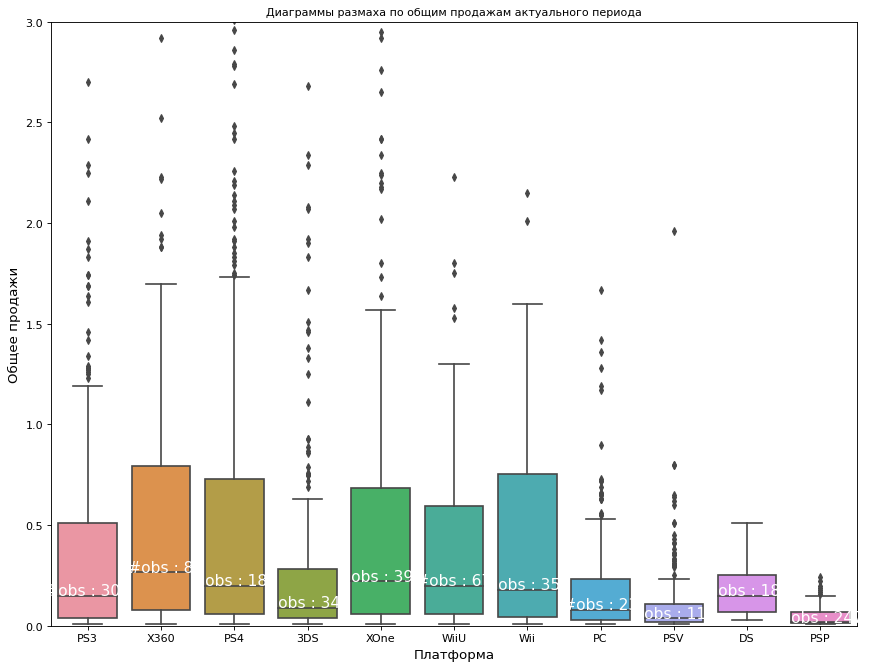

In [53]:
#Создаём график по этим данным
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='platform', y='general_sales', data=act_data, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(act_data,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in act_data.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = act_data.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "#obs : "+str(n_ob), horizontalalignment='center',
                 fontdict={'size':14}, color='white')

add_n_obs(act_data,group_col='platform',y='general_sales')    

# Decoration
plt.title('Диаграммы размаха по общим продажам актуального периода', fontsize=10)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Общее продажи',fontsize=12)
plt.ylim(0,3)
plt.show()

Вывод

Продажи от 200000 до 700000, не считая редкие значения,самая большая продоваемость у  игр XOne. Самая низкая у игр 3DS.Если сравнить XOne и 3DS(не считая редкие значения),скорее всего,тут дело в характеристики игр.

Х360- минимальный доход 10000, 3/4-400000, максимальный-21 млн.- медиана 110000

3DS-мин.доход 10000,3/4-280000,макс.-14 млн.-медиана 90000

XOne-мин.доход 10000,3/4-685000,макс.-7 млн.-медиана 220000

PS3-мин.доход 10000,3/4-400000,макс.-21 млн.-медиана 110000

PS4-мин.доход 10000,3/4-730000,макс.-14 млн.-медиана 200000

### Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [54]:
#Создаём новый датафрейм по платформам и по столбцам 'critic_score','user_score','general_sales'
act_data_affect_x360 = act_data_x360.loc[:,['critic_score','user_score','general_sales']]
act_data_affect_x360

,critic_score,user_score,general_sales
23,97.0,8.1,16.27
60,73.0,2.6,10.24
72,NaN,NaN,9.18
263,NaN,4.9,4.28
271,84.0,4.2,4.22
...,...,...,...
16298,NaN,NaN,0.01
16447,NaN,4.5,0.01
16457,NaN,6.2,0.01
16488,NaN,NaN,0.01


,critic_score,user_score,general_sales
critic_score,1.000000,0.520946,0.350345
user_score,0.520946,1.000000,-0.011742
general_sales,0.350345,-0.011742,1.000000


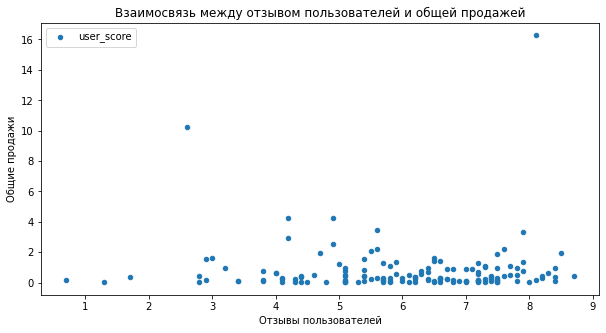

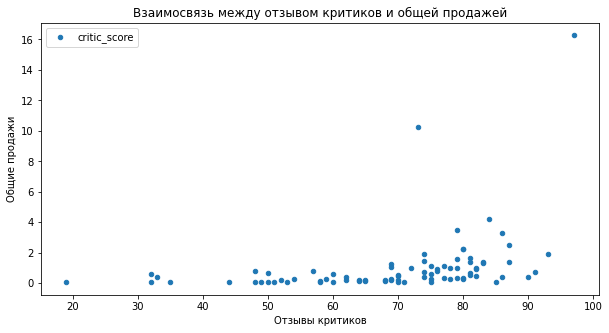

In [55]:
#Создаём диаграмму рассеяния по этим данным
act_data_affect_x360.plot.scatter(x='user_score',
                      y='general_sales',figsize=(10,5));
plt.title('Взаимосвязь между отзывом пользователей и общей продажей')
plt.legend(['user_score'])
plt.xlabel('Отзывы пользователей')
plt.ylabel('Общие продажи');

act_data_affect_x360.plot.scatter(x='critic_score',
                      y='general_sales',figsize=(10,5));
plt.title('Взаимосвязь между отзывом критиков и общей продажей')
plt.legend(['critic_score'])
plt.xlabel('Отзывы критиков')
plt.ylabel('Общие продажи');

act_data_affect_x360.corr()

In [56]:
#Создаём новый датафрейм по платформам и по столбцам 'critic_score','user_score','general_sales'
act_data_affect_3ds = act_data_3ds.loc[:,['critic_score','user_score','general_sales']]
act_data_affect_3ds

,critic_score,user_score,general_sales
33,NaN,NaN,14.60
47,NaN,NaN,11.68
96,NaN,NaN,7.55
108,NaN,NaN,7.14
184,NaN,NaN,5.22
...,...,...,...
16605,NaN,NaN,0.01
16607,NaN,NaN,0.01
16645,NaN,NaN,0.01
16665,NaN,NaN,0.01


,critic_score,user_score,general_sales
critic_score,1.000000,0.769536,0.357057
user_score,0.769536,1.000000,0.241504
general_sales,0.357057,0.241504,1.000000


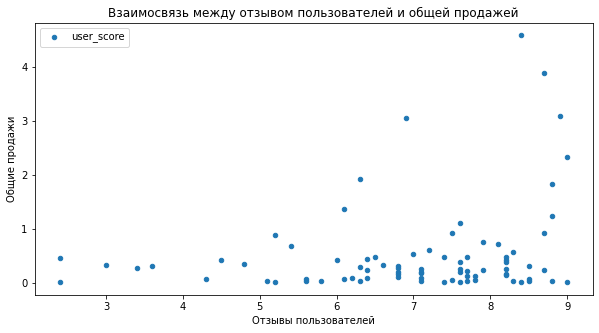

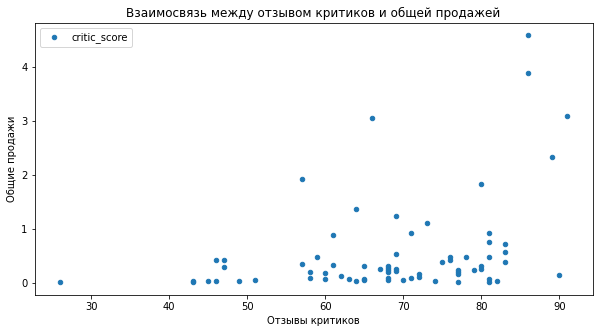

In [57]:
#Создаём диаграмму рассеяния по этим данным
act_data_affect_3ds.plot.scatter(x='user_score',
                      y='general_sales',figsize=(10,5));
plt.title('Взаимосвязь между отзывом пользователей и общей продажей')
plt.legend(['user_score'])
plt.xlabel('Отзывы пользователей')
plt.ylabel('Общие продажи');

act_data_affect_3ds.plot.scatter(x='critic_score',
                      y='general_sales',figsize=(10,5));
plt.title('Взаимосвязь между отзывом критиков и общей продажей')
plt.legend(['critic_score'])
plt.xlabel('Отзывы критиков')
plt.ylabel('Общие продажи');

act_data_affect_3ds.corr()

In [58]:
#Создаём новый датафрейм по платформам и по столбцам 'critic_score','user_score','general_sales'
act_data_affect_xone = act_data_xone.loc[:,['critic_score','user_score','general_sales']]
act_data_affect_xone

,critic_score,user_score,general_sales
99,NaN,NaN,7.39
165,97.0,7.9,5.47
179,81.0,5.4,5.26
242,84.0,6.4,4.49
270,88.0,6.2,4.22
...,...,...,...
16627,63.0,8.2,0.01
16640,NaN,6.6,0.01
16642,NaN,NaN,0.01
16657,74.0,6.7,0.01


,critic_score,user_score,general_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
general_sales,0.416998,-0.068925,1.000000


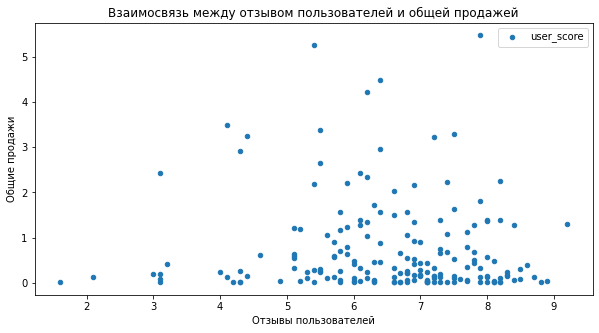

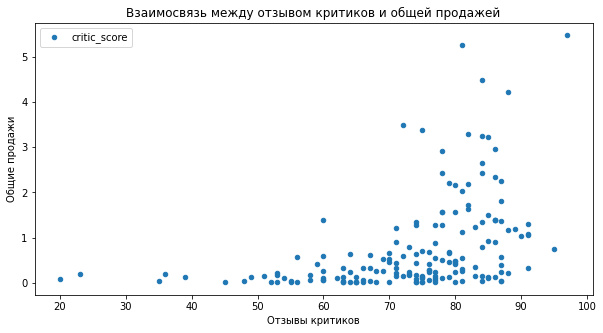

In [59]:
#Создаём диаграмму рассеяния по этим данным
act_data_affect_xone.plot.scatter(x='user_score',
                      y='general_sales',figsize=(10,5));
plt.title('Взаимосвязь между отзывом пользователей и общей продажей')
plt.legend(['user_score'])
plt.xlabel('Отзывы пользователей')
plt.ylabel('Общие продажи');

act_data_affect_xone.plot.scatter(x='critic_score',
                      y='general_sales',figsize=(10,5));
plt.title('Взаимосвязь между отзывом критиков и общей продажей')
plt.legend(['critic_score'])
plt.xlabel('Отзывы критиков')
plt.ylabel('Общие продажи');

act_data_affect_xone.corr()

In [60]:
#Создаём новый датафрейм по платформам и по столбцам 'critic_score','user_score','general_sales'
act_data_affect_ps3 = act_data_ps3.loc[:,['critic_score','user_score','general_sales']]
act_data_affect_ps3

,critic_score,user_score,general_sales
16,97.0,8.2,21.05
69,71.0,2.6,9.36
126,86.0,4.3,6.46
149,95.0,9.1,5.86
180,NaN,NaN,5.27
...,...,...,...
16555,NaN,NaN,0.01
16635,NaN,NaN,0.01
16671,NaN,NaN,0.01
16688,NaN,NaN,0.01


,critic_score,user_score,general_sales
critic_score,1.000000,0.599920,0.334285
user_score,0.599920,1.000000,0.002394
general_sales,0.334285,0.002394,1.000000


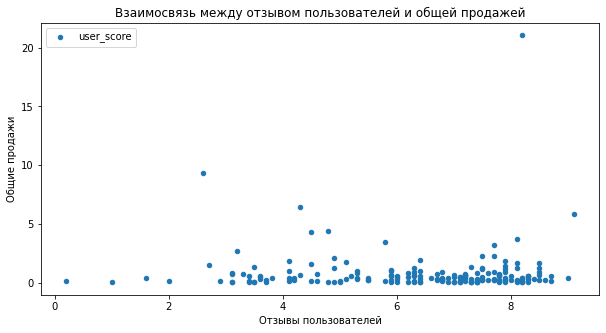

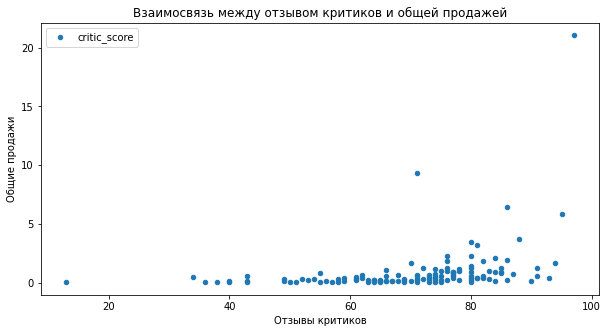

In [61]:
#Создаём диаграмму рассеяния по этим данным
act_data_affect_ps3.plot.scatter(x='user_score',
                      y='general_sales',figsize=(10,5));
plt.title('Взаимосвязь между отзывом пользователей и общей продажей')
plt.legend(['user_score'])
plt.xlabel('Отзывы пользователей')
plt.ylabel('Общие продажи');

act_data_affect_ps3.plot.scatter(x='critic_score',
                      y='general_sales',figsize=(10,5));
plt.title('Взаимосвязь между отзывом критиков и общей продажей')
plt.legend(['critic_score'])
plt.xlabel('Отзывы критиков')
plt.ylabel('Общие продажи');

act_data_affect_ps3.corr()

In [62]:
#Создаём новый датафрейм по платформам и по столбцам 'critic_score','user_score','general_sales'
act_data_affect_ps4 = act_data_ps4.loc[:,['critic_score','user_score','general_sales']]
act_data_affect_ps4

,critic_score,user_score,general_sales
31,NaN,NaN,14.63
42,97.0,8.3,12.62
77,82.0,4.3,8.58
87,NaN,NaN,7.98
92,83.0,5.7,7.66
...,...,...,...
16497,69.0,7.5,0.01
16500,NaN,NaN,0.01
16523,61.0,7.9,0.01
16527,51.0,5.5,0.01


,critic_score,user_score,general_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
general_sales,0.406568,-0.031957,1.000000


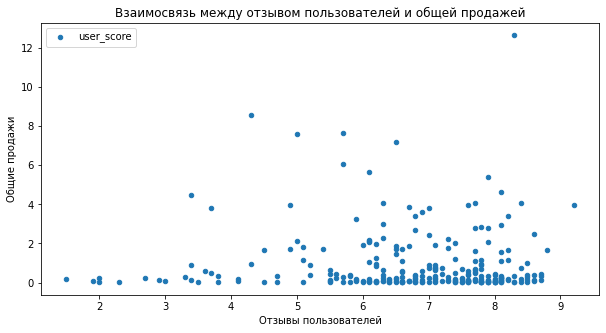

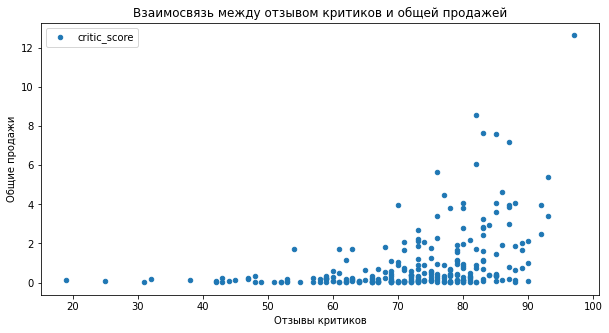

In [63]:
#Создаём диаграмму рассеяния по этим данным
act_data_affect_ps4.plot.scatter(x='user_score',
                      y='general_sales',figsize=(10,5));
plt.title('Взаимосвязь между отзывом пользователей и общей продажей')
plt.legend(['user_score'])
plt.xlabel('Отзывы пользователей')
plt.ylabel('Общие продажи');

act_data_affect_ps4.plot.scatter(x='critic_score',
                      y='general_sales',figsize=(10,5));
plt.title('Взаимосвязь между отзывом критиков и общей продажей')
plt.legend(['critic_score'])
plt.xlabel('Отзывы критиков')
plt.ylabel('Общие продажи');

act_data_affect_ps4.corr()

Вывод

X360,3DS,XOne,PS3,PS4- Между оценкой критиков,оценкой пользователей и общей продажей сильной зависимости нет, коореляция близко к 0.

X360-0.350345,-0.011742(соотвтсвенно)

3DS-0.357057,0.241504(соотвтсвенно)

XOne-0.416998,-0.068925(соотвтсвенно)

PS3- 0.334285,0.002394(соотвтсвенно)

PS4-0.406568,-0.031957(соотвтсвенно)


Критики ставят оценку комплексно. Они смотрят не только на сюжет игры, но и на графику, геймплей, сюжет, техническую реализацию, эмоции и так далее. И это обьективная оценка. А пользователи ставят свою субьективную оценку. Есть корреляция между оценкой критиков и оценкой пользователей.Это говорит о том, для пользователей важна оценка критиков.

In [64]:
actual_data_all_plat = act_data[['platform','general_sales', 'user_score', 'critic_score']]
for platform in act_data['platform'].unique():
   
    print(platform)  
    print(actual_data_all_plat[actual_data_all_plat['platform'] == platform].corr())   

PS3
               general_sales  user_score  critic_score
general_sales       1.000000    0.002394      0.334285
user_score          0.002394    1.000000      0.599920
critic_score        0.334285    0.599920      1.000000
X360
               general_sales  user_score  critic_score
general_sales       1.000000   -0.011742      0.350345
user_score         -0.011742    1.000000      0.520946
critic_score        0.350345    0.520946      1.000000
PS4
               general_sales  user_score  critic_score
general_sales       1.000000   -0.031957      0.406568
user_score         -0.031957    1.000000      0.557654
critic_score        0.406568    0.557654      1.000000
3DS
               general_sales  user_score  critic_score
general_sales       1.000000    0.241504      0.357057
user_score          0.241504    1.000000      0.769536
critic_score        0.357057    0.769536      1.000000
XOne
               general_sales  user_score  critic_score
general_sales       1.000000   -0.068925   

,general_sales,user_score,critic_score
general_sales,1.000000,-0.002608,0.313700
user_score,-0.002608,1.000000,0.502221
critic_score,0.313700,0.502221,1.000000


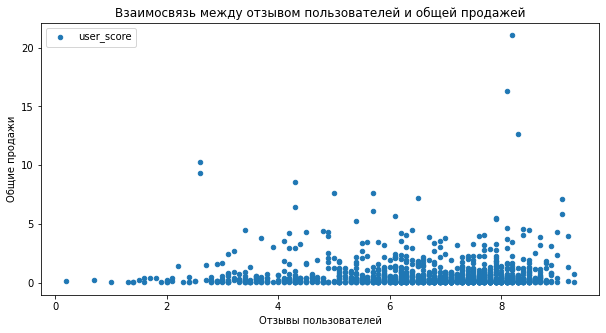

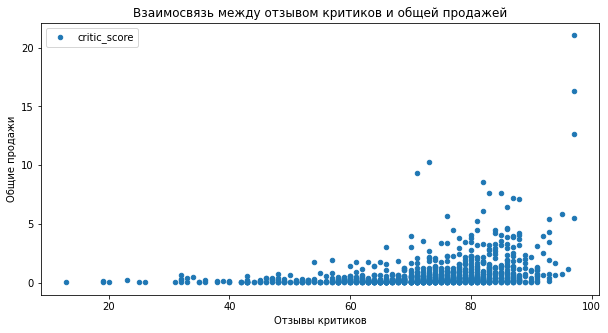

In [65]:
actual_data_all_plat.plot.scatter(x='user_score',
                      y='general_sales',figsize=(10,5));
plt.title('Взаимосвязь между отзывом пользователей и общей продажей')
plt.legend(['user_score'])
plt.xlabel('Отзывы пользователей')
plt.ylabel('Общие продажи');

actual_data_all_plat.plot.scatter(x='critic_score',
                      y='general_sales',figsize=(10,5));
plt.title('Взаимосвязь между отзывом критиков и общей продажей')
plt.legend(['critic_score'])
plt.xlabel('Отзывы критиков')
plt.ylabel('Общие продажи');

actual_data_all_plat.corr()

Вывод

Во всех случаях взаимосвязь между оценками пользователя,оценкой критиков и общей продоваемостью ближе к 0. А вот у Wii есть взаимосвязь между оценками пользователя  и общей продоваемостью.

### Посмотрим на общее распределение игр по жанрам.

In [66]:
#Создаём датафрейм суммарное количество по  жанрам
game_genres = pd.pivot_table(act_data, index='genre', values='general_sales',
                            aggfunc={'general_sales':'sum'})
game_genres.sort_values(by='general_sales',ascending=False)


,general_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


,general_sales
count,12.000000
mean,90.890833
std,101.117056
min,3.170000
25%,23.170000
50%,41.260000
75%,147.080000
max,321.870000


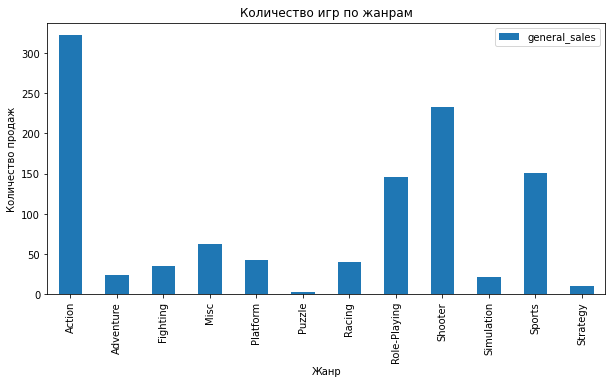

In [67]:
#Создайм график по этим данным
game_genres.plot(kind='bar',figsize=(10,5));
plt.title('Количество игр по жанрам')
plt.ylabel('Количество продаж')
plt.xlabel('Жанр')
game_genres.describe()

In [68]:
#Создаём новый датафрейм с медианой продаж по жанрам
game_genres_mean = pd.pivot_table(act_data, index='genre', values='general_sales',
                            aggfunc={'general_sales':'mean'})
game_genres_mean.sort_values(by='general_sales',ascending=False)


,general_sales
genre,
Shooter,1.245882
Sports,0.703972
Platform,0.576081
Role-Playing,0.499623
Racing,0.469294
Fighting,0.441375
Action,0.420196
Misc,0.405290
Simulation,0.350968


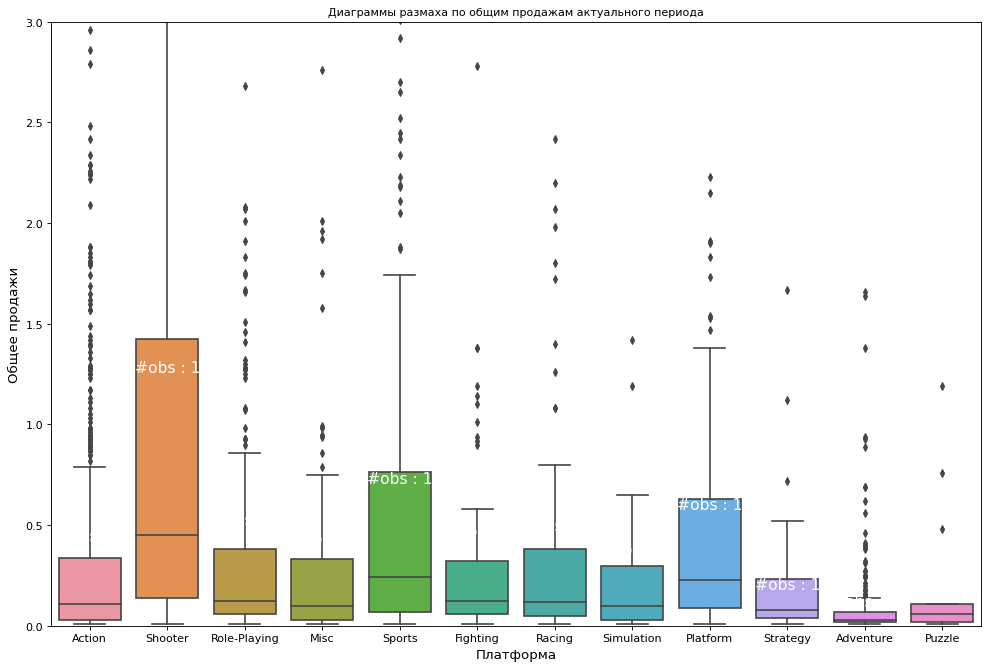

In [69]:
#Создаём функцию для построения графика
plt.figure(figsize=(15,10), dpi= 80)
sns.boxplot(x='genre', y='general_sales', data=act_data, notch=False)


def add_n_obs(game_genres_mean,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in game_genres_mean.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = game_genres_mean.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "#obs : "+str(n_ob), horizontalalignment='center',
                 fontdict={'size':14}, color='white')

add_n_obs(game_genres_mean,group_col='genre',y='general_sales')    


plt.title('Диаграммы размаха по общим продажам актуального периода', fontsize=10)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Общее продажи',fontsize=12)
plt.ylim(0,3)
plt.show()

Вывод

Если сравнить медиан продаж по жанрам получается топ 4 жанры

1. Shooter	1.245882


2. Sports	0.703972


3. Platform	0.576081


4. Role-Playing	0.499623


## Составить портрет пользователя каждого региона

### Самые популярные платформы (топ-5). 

In [70]:
#Создаём новый датафрейм по продажам платформ в отдельных регионах
platform_na = pd.pivot_table(act_data, index='platform', values='na_sales', aggfunc='sum')
platform_na.sort_values(by='na_sales',ascending=False)


,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


In [71]:
#Создаём датафрейм топ продаж в  данном регионе
top_platform_na = platform_na.query('na_sales > 37')
top_platform_na.sort_values(by='na_sales',ascending=False)

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


In [72]:
#Создаём новый датафрейм по продажам платформ в отдельных регионах
platform_eu = pd.pivot_table(act_data, index='platform', values='eu_sales', aggfunc='sum')
platform_eu.sort_values(by='eu_sales',ascending=False)

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


In [73]:
#Создаём датафрейм топ продаж в  данном регионе
top_platform_eu = platform_eu.query('eu_sales > 29')
top_platform_eu.sort_values(by='eu_sales',ascending=False)

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


In [74]:
#Создаём новый датафрейм по продажам платформ в отдельных регионах
platform_jp = pd.pivot_table(act_data, index='platform', values='jp_sales', aggfunc='sum')
platform_jp.sort_values(by='jp_sales',ascending=False)

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
PSP,3.29
X360,0.51
XOne,0.34
Wii,0.05


In [75]:
#Создаём датафрейм топ продаж в  данном регионе
top_platform_jp = platform_jp.query('jp_sales > 10')
top_platform_jp.sort_values(by='jp_sales',ascending=False)

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


In [76]:
#Создаём новый датафрейм по продажам платформ в отдельных регионах
platform_other = pd.pivot_table(act_data, index='platform', values='other_sales', aggfunc='sum')
platform_other.sort_values(by='other_sales',ascending=False)

,other_sales
platform,
PS4,48.35
PS3,26.77
XOne,14.27
X360,12.11
3DS,6.28
WiiU,4.69
PSV,3.26
PC,2.96
Wii,1.12


In [77]:
#Создаём датафрейм топ продаж в  данном регионе
top_platform_other = platform_other.query('other_sales > 5')
top_platform_other.sort_values(by='other_sales',ascending=False)

,other_sales
platform,
PS4,48.35
PS3,26.77
XOne,14.27
X360,12.11
3DS,6.28


In [78]:
#Создаём новый датафрейм по продажам платформ во всех регионах
platform_by_regions = act_data.pivot_table(['na_sales','eu_sales','jp_sales','other_sales','general_sales'],
                                        ['platform'], aggfunc='sum').sort_values(by='general_sales', ascending=False)
platform_by_regions

,eu_sales,general_sales,jp_sales,na_sales,other_sales
platform,,,,,
PS4,141.09,314.14,15.96,108.74,48.35
PS3,67.81,181.43,23.35,63.50,26.77
XOne,51.59,159.32,0.34,93.12,14.27
3DS,30.96,143.25,67.81,38.20,6.28
X360,42.52,136.80,0.51,81.66,12.11
WiiU,19.85,64.63,10.88,29.21,4.69
PC,25.36,39.43,0.00,11.11,2.96
PSV,6.10,32.99,18.59,5.04,3.26
Wii,5.93,13.66,0.05,6.56,1.12


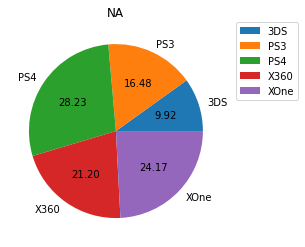

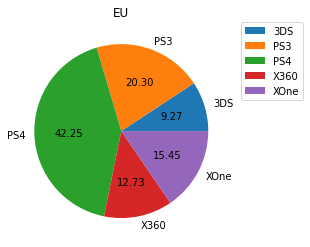

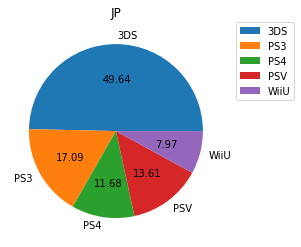

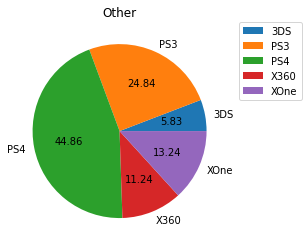

In [79]:
#Создаём графики топ 5 по платформам во всех регионах
top_platform_na.plot.pie(autopct='%.2f',subplots=True)
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )
plt.title('NA')
plt.ylabel("");
top_platform_eu.plot.pie(autopct='%.2f',subplots=True)
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )
plt.title('EU')
plt.ylabel("");
top_platform_jp.plot.pie(autopct='%.2f',subplots=True)
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )
plt.title('JP')
plt.ylabel("");
top_platform_other.plot.pie(autopct='%.2f',subplots=True)
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )
plt.ylabel("")
plt.title('Other');

Вывод

В Японии больше всего продаётся 3DS производство Nintendo.
Может быть это связано конкуренцией между компанией Sony  и Nintendo. Пользователи в Японии больше предпочитают Японского производителя Nintendo. В Европе,в США и в остальных регионах-PS4

### Самые популярные жанры (топ-5).

In [80]:
#Создаём новый датафрейм продаж по жанрам в отдельных регионах
genres_jp = pd.pivot_table(act_data, index='genre', values='jp_sales', aggfunc='sum')
genres_jp.sort_values(by='jp_sales',ascending=False)

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


In [81]:
#Создаём датафрейм топ продаж в  данном регионе
top_genres_jp = genres_jp.query('jp_sales > 6')
top_genres_jp.sort_values(by='jp_sales',ascending=False)

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


In [82]:
#Создаём новый датафрейм продаж по жанрам в отдельных регионах
genres_eu = pd.pivot_table(act_data, index='genre', values='eu_sales', aggfunc='sum')
genres_eu.sort_values(by='eu_sales',ascending=False)

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


In [83]:
#Создаём датафрейм топ продаж в  данном регионе
top_genres_ue = genres_eu.query('eu_sales > 20.05')
top_genres_ue.sort_values(by='eu_sales',ascending=False)

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


In [84]:
#Создаём новый датафрейм продаж по жанрам в отдельных регионах
genres_na = pd.pivot_table(act_data, index='genre', values='na_sales', aggfunc='sum')
genres_na.sort_values(by='na_sales',ascending=False)

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


In [85]:
#Создаём датафрейм топ продаж в  данном регионе
top_genres_na = genres_na.query('na_sales > 20')
top_genres_na.sort_values(by='na_sales',ascending=False)

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


In [86]:
#Создаём новый датафрейм продаж по жанрам в отдельных регионах
genres_other = pd.pivot_table(act_data, index='genre', values='other_sales', aggfunc='sum')
genres_other.sort_values(by='other_sales',ascending=False)

,other_sales
genre,
Action,37.20
Shooter,28.77
Sports,19.45
Role-Playing,11.48
Misc,6.09
Racing,4.44
Platform,4.12
Fighting,3.56
Adventure,2.43


In [87]:
#Создаём датафрейм топ продаж в  данном регионе
top_genres_other = genres_other.query('other_sales > 6')
top_genres_other.sort_values(by='other_sales',ascending=False)

,other_sales
genre,
Action,37.20
Shooter,28.77
Sports,19.45
Role-Playing,11.48
Misc,6.09


In [88]:
#Создаём новый датафрейм продажи по жанрам в отдельных регионах
genres_by_regions = act_data.pivot_table(['na_sales','eu_sales','jp_sales','other_sales','general_sales'],['genre'], aggfunc='sum').sort_values(by='na_sales', ascending=False)
                                         
genres_by_regions

,eu_sales,general_sales,jp_sales,na_sales,other_sales
genre,,,,,
Action,118.13,321.87,40.49,126.05,37.20
Shooter,87.86,232.98,6.61,109.74,28.77
Sports,60.52,150.65,5.41,65.27,19.45
Role-Playing,36.97,145.89,51.04,46.40,11.48
Misc,20.04,62.82,9.20,27.49,6.09
Platform,15.58,42.63,4.79,18.14,4.12
Fighting,8.55,35.31,7.65,15.55,3.56
Racing,20.19,39.89,2.30,12.96,4.44
Adventure,8.25,23.64,5.82,7.14,2.43


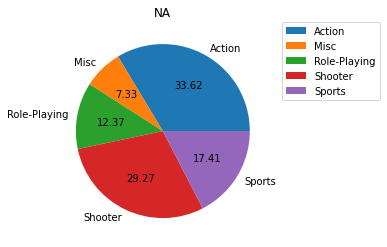

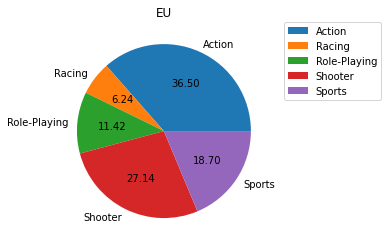

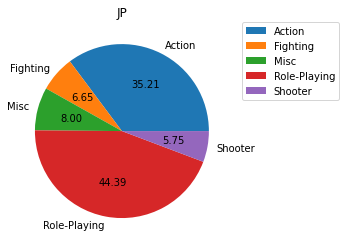

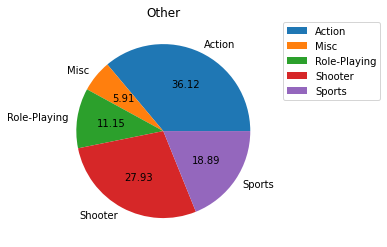

In [89]:
#Создаём графики топ 5 по жанрам во всех регионах
top_genres_na.plot.pie(autopct='%.2f',subplots=True)
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )
plt.title('NA')
plt.ylabel("");
top_genres_ue.plot.pie(autopct='%.2f',subplots=True)
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )
plt.title('EU')
plt.ylabel("");
top_genres_jp.plot.pie(autopct='%.2f',subplots=True)
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )
plt.title('JP')
plt.ylabel("");
top_genres_other.plot.pie(autopct='%.2f',subplots=True)
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )
plt.ylabel("")
plt.title('Other');

Вывод

Самым популярным жанром в Северной Америк, Европе и остальных регионах считается Action(боевик).
В Японии предпочитают жанр Role-Playing(Ролевая игра).

### Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе.

«EC» («Early childhood») — «Для детей младшего возраста».Игра подходит для детей от 3 лет и старше

«E» («Everyone») — «Для всех».Для возрастной категории от 6 лет и старше

«E10+» («Everyone 10 and older») — «Для всех старше 10 лет»

«T» («Teen») — «Подросткам».Игра подходит для лиц от 13 лет и старше.

«M» («Mature») — «От 17 лет»

«AO» («Adults Only 18+») — «Только для взрослых»

«RP» («Rating Pending»") — «Рейтинг ожидается»

In [90]:
#Создаём новый датафрейм продаж по рейтингу в отдельных регионах
esrb_rating_na = pd.pivot_table(act_data, index='rating', values='na_sales',aggfunc='sum')
esrb_rating_na.sort_values(by='na_sales',ascending=False)

,na_sales
rating,
M,165.21
RP,89.42
E,79.05
E10+,54.24
T,49.79


count      5.000000
mean      87.542000
std       46.481706
min       49.790000
25%       54.240000
50%       79.050000
75%       89.420000
max      165.210000
Name: na_sales, dtype: float64

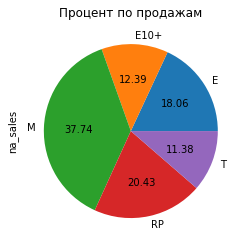

In [91]:
#Получаем график по этим данным
esrb_rating_na['na_sales'].plot.pie(autopct='%.2f');
plt.title('Процент по продажам')
esrb_rating_na['na_sales'].describe()

In [92]:
#Создаём новый датафрейм продаж по рейтингу в отдельных регионах
esrb_rating_eu = pd.pivot_table(act_data, index='rating', values='eu_sales',aggfunc='sum')
esrb_rating_eu.sort_values(by='eu_sales',ascending=False)

,eu_sales
rating,
M,145.32
E,83.36
RP,78.91
E10+,42.69
T,41.95


count      5.000000
mean      78.446000
std       42.151347
min       41.950000
25%       42.690000
50%       78.910000
75%       83.360000
max      145.320000
Name: eu_sales, dtype: float64

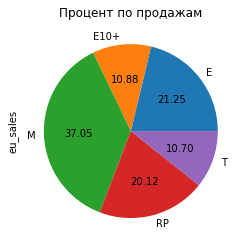

In [93]:
#Получаем график по этим данным
esrb_rating_eu['eu_sales'].plot.pie(autopct='%.2f');
plt.title('Процент по продажам')
esrb_rating_eu['eu_sales'].describe()

In [94]:
#Создаём новый датафрейм продаж по рейтингу в отдельных регионах
esrb_rating_jp = pd.pivot_table(act_data, index='rating', values='jp_sales',aggfunc='sum')
esrb_rating_jp.sort_values(by='jp_sales',ascending=False)

,jp_sales
rating,
RP,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


count     5.000000
mean     28.156000
std      32.236054
min       5.890000
25%      14.110000
50%      15.140000
75%      20.590000
max      85.050000
Name: jp_sales, dtype: float64

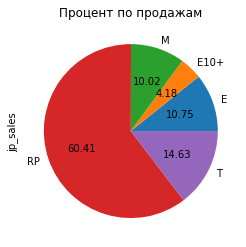

In [95]:
#Получаем график по этим данным
esrb_rating_jp['jp_sales'].plot.pie(autopct='%.2f');
plt.title('Процент по продажам')
esrb_rating_jp['jp_sales'].describe()

In [96]:
#Создаём новый датафрейм продаж по рейтингу в отдельных регионах
esrb_rating_other = pd.pivot_table(act_data, index='rating', values='other_sales',aggfunc='sum')
esrb_rating_other.sort_values(by='other_sales',ascending=False)

,other_sales
rating,
M,47.04
RP,23.46
E,22.61
T,14.29
E10+,12.57


count     5.000000
mean     23.994000
std      13.765847
min      12.570000
25%      14.290000
50%      22.610000
75%      23.460000
max      47.040000
Name: other_sales, dtype: float64

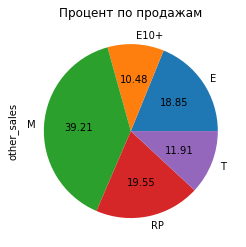

In [97]:
#Получаем график по этим данным
esrb_rating_other['other_sales'].plot.pie(autopct='%.2f');
plt.title('Процент по продажам')
esrb_rating_other['other_sales'].describe()

Вывод

Рейтинг влияет на продажи в отделних регионах.
Так же, как в остольных случая Япония отличается. Там большая часть инр неопределёныи рейтингом.Дело в том что  деятельность ESRB официально ограничена Канадой, США и Мексикой . А в Северной Америкие,Европе и в остальных регионах больше покупателей 17+.

In [98]:
# Комментарий ревьюера
temp = act_data.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


RP      977
M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

## Проверяем гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [99]:
#Создаём отдельные датафреймы и удаляем пропуски для проверки гипотез
xbox_platform = act_data.query('platform=="XOne"')
xbox_platform = act_data.query('platform=="XOne"')['user_score'].dropna()

pc_platform = act_data.query('platform=="PC"')
pc_platform = act_data.query('platform=="PC"')['user_score'].dropna()


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что отфильтровали пропуски. 👍</font>

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

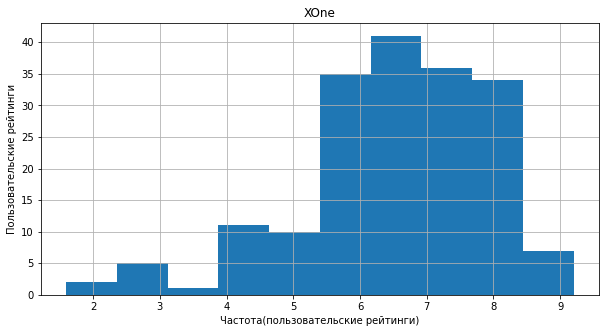

In [100]:
#Получаем гистограмму по этим данным
xbox_platform.hist(bins=10,figsize=(10,5))
plt.title('XOne')
plt.ylabel('Пользовательские рейтинги')
plt.xlabel('Частота(пользовательские рейтинги)');
xbox_platform.describe()

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

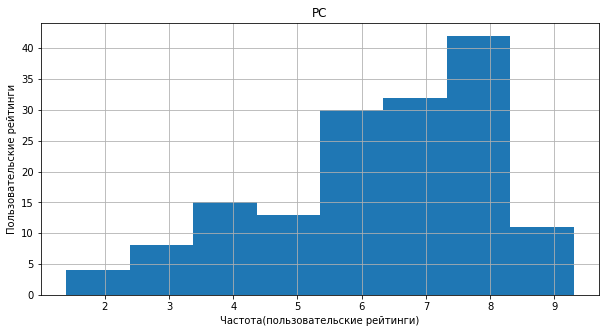

In [101]:
#Получаем гистограмму по этим данным
pc_platform.hist(bins=8,figsize=(10,5))
plt.title('PC')
plt.ylabel('Пользовательские рейтинги')
plt.xlabel('Частота(пользовательские рейтинги)');
pc_platform.describe()

Графики показывают, что среднее не слишком отличается.

Будем проверять гипотезу будем с помощю ttest.ind(равенстве средних двух генеральных совокупностей)

Нулевая гипотеза-Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза-Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

In [102]:
#Проверяем гипотезу с помощю ttest
alpha = 0.05
results = st.ttest_ind(xbox_platform,pc_platform)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Результат ttest-а:Не получилось отвергнуть нулевую гипотезу. По результатам уровень значимасти не превышает p-value(вероятность) нулевой гипотезы.Могу сказать,что альтернативная гипотеза маловераятно при условии, что гипотеза верна.

Вывод

На уровне значимости 5%  нет основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) платформ Xbox One и PC в пользу альтернативной гипотезы.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [103]:
#Создаём отдельные датафреймы и удаляем пропуски для проверки гипотез
action_genre_rating = act_data.query('genre=="Action"')['user_score'].dropna()
sports_genre_rating= act_data.query('genre=="Sports"')['user_score'].dropna()

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

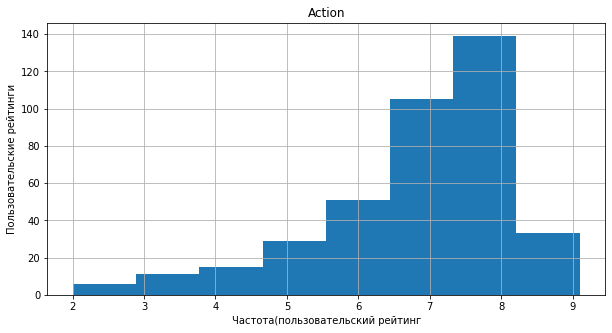

In [104]:
#Получаем гистограмму по этим данным
action_genre_rating.hist(bins=8,figsize=(10,5))
plt.title('Action')
plt.ylabel('Пользовательские рейтинги')
plt.xlabel('Частота(пользовательский рейтинг');
action_genre_rating.describe()

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

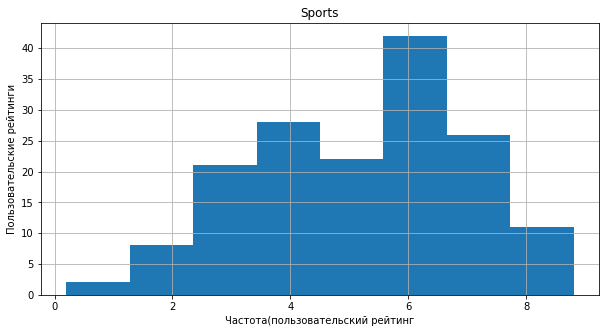

In [105]:
#Получаем гистограмму по этим данным
sports_genre_rating.hist(bins=8,figsize=(10,5))
plt.title('Sports')
plt.ylabel('Пользовательские рейтинги')
plt.xlabel('Частота(пользовательский рейтинг');
sports_genre_rating.describe()

In [106]:
print(sports_genre_rating.mean())
print(action_genre_rating.mean())

5.238124999999999
6.837532133676092


Графики показывают, что среднее  отличается.

Будем проверять гипотезу будем с помощю ttest.ind(равенстве средних двух генеральных совокупностей)

Нулевая гипотеза-cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

Альтернативная гипотеза- cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)  разные

In [107]:
#Проверяем гипотезу с помощю ttest
alpha = 0.05
results = st.ttest_ind(action_genre_rating, sports_genre_rating)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Результат ttest-а:Отвергаем нулевую гипотезу. По результатам уровень значимасти  превышает p-value(вероятность) нулевой гипотезы.Могу сказать,что альтернативная гипотеза маловераятно при условии, что гипотеза верна.

Вывод

На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.

## Общий вывод

Изучили данные.

Название колонок были написаны заглавными буквами, привели к нижнему регистру

Были неправильные типы данных в столбцах year_of_release и user_score, из object на float

Нашли пропуски в столбцах name,year_of_release,genre,critic_score,user_score,rating. В name,year_of_release и genre удалили пропуски.По скольку они состовляли небольшую процентность от общих строк. А в остальных случаях оставили так,как есть. Между пропусками user_score и critic_score есть взоимосвязь. Удалить эти строки нельзя их очень много. А заполнить средним скорее всего данные будут искажены. В rating  тоже не трогали пропуски.

Аббревиатура TBD(To Be Determined) означает будет определено.Заполнили, как без информации(nan).

В рейтинге ESRB есть аббревиату́ра K-A, это игры, содержащие контент, подходящий для широкой аудитории. Этот рейтинг использовался до 1998 года, тогда он был переименован в E. Пропуски в колонке рейтинг скорее всего связано с тем что эти игры либо вышли до того, как начили обозначить по категориям ESRB или эти игры вышли в Японии. По скольку рейтинг ESRB официально ограничена Канадой, США и Мексикой.Поменяли эти пропуски на RP

Исследовательский анализ.

Изучили продажи игр по годам.
По данным с 1980 ого до 1990 ого года мировом рынке игр был кризис и осноная монополия ввела Япония. после 1994ого года, когда впервы вышел playstation 1, рынок игр начал рости. В 1994 году приняли рейтинг ESRB. С 2000 года начинали выпускать больше игр и был рост продаж по играм.Спад продаж тоже обусловлена быстрым технологическим прорывом.Что бы игра продавалось, нужно что бы он соответствовал всем требованиям. Самое большое количество игр выпускалась в 2008г-у-1427игр.

Изучили продажи платформ по годам.
По этим данным видим что период продоваймости приставок примерно от 8 до 12 месяцев. Если взять к примеру PS то его продоваемость 5-6 лет до cледуюшего релиза новой PS.

PS-1995

PS2-2002

PS3-2006

PS4-2013


Актуальный период выбрали начиная с 2013ого.

Узнали ТОП 10 продоваемых платформ актуального периода.
Самая большая продоваемоть у PS2. Во время расчётов не исключили PS4,потому что релиз этой платформы было 2013 году. Ещё один фактор-Sony Corp считается одним из гиантов в рынке игровых приставок.

 Продажи топ 5 + PS4 от 200000 до 700000, не считая редкие значения,самая большая продоваемость у игр XOne. Самая низкая у игр 3DS.Если сравнить XOne и 3DS(не считая редкие значения),скорее всего,тут дело в характеристики игр.

Х360- минимальный доход 10000, 3/4-400000, максимальный-21 млн.- медиана 110000

3DS-мин.доход 10000,3/4-280000,макс.-14 млн.-медиана 90000

XOne-мин.доход 10000,3/4-685000,макс.-7 млн.-медиана 220000

PS3-мин.доход 10000,3/4-400000,макс.-21 млн.-медиана 110000

PS4-мин.доход 10000,3/4-730000,макс.-14 млн.-медиана 200000

Изучили влияние отзывов пользователей и критиков на продажы платформ.

X360,3DS,XOne,PS3,PS4- Между оценкой критиков,оценкой пользователей и общей продажей сильной зависимости нет, коореляция близко к 0.

X360- 0.350345,-0.011742(соотвтсвенно)

3DS- 0.357057,0.241504(соотвтсвенно)

XOne- 0.416998,-0.068925(соотвтсвенно)

PS3- 0.334285,0.002394(соотвтсвенно)

PS4- 0.406568,-0.031957(соотвтсвенно)


Критики ставят оценку комплексно. Они смотрят не только на сюжет игры, но и на графику, геймплей, сюжет, техническую реализацию, эмоции и так далее. И это обьективная оценка. А пользователи ставят свою субьективную оценку. Есть корреляция между оценкой критиков и оценкой пользователей.Это говорит о том,что для пользователей важна оценка критиков.

Во всех случаях взаимосвязь между оценками пользователя,оценкой критиков и общей продоваемостью ближе к 0. А вот у Wii есть взаимосвязь между оценками пользователя  и общей продоваемостью.




Если сравнить медиан продаж по жанрам получается топ 4 жанры

Shooter 1.245882
Sports 0.703972
Platform 0.576081
Role-Playing 0.499623

Посмотрели продажи платформ по регионам.В Японии больше всего продаётся 3DS производство Nintendo. Может быть это связано конкуренцией между компанией Sony и Nintendo. Пользователи в Японии больше предпочитают Японского производителя Nintendo. В Европе,в США,востальных регионах-PS4


Посмотрели по жанрам продажи игр в отдельных регионах. Самым популярным жанром в Северной Америк, Европе и остальных регионах считается Action(боевик). В Японии предпочитают жанр Role-Playing(Ролевая игра)


Посмотрели на влияние рейтинга по продажам в отдельных регионах.Рейтинг влияет на продажи в отделних регионах. Так же, как в остольных случая Япония отличается. Там большая часть инр неопределёныи рейтингом.Дело в том что деятельность ESRB официально ограничена Канадой, США и Мексикой . А в Северной Америкие,Европе и в остальных регионах больше покупателей 17+.

Проверили гипотезу с помощю ttest.ind(равенстве средних двух генеральных совокупностей)

Нулевая гипотеза-Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза-Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

Не смогли отвергнуть нулевую гипотезу.На уровне значимости 5%  нет основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) платформ Xbox One и PC в пользу альтернативной гипотезы.

Проверили гипотезу с помощю ttest.ind(равенстве средних двух генеральных совокупностей)

Нулевая гипотеза-cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

Альтернативная гипотеза- cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Нулевая гипотеза была отвергнута. На уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.

После всего иследовния можно предположить, что в игровом рынке действует большая конкуренция.В основном это корпорации Sony Corp,  Nintendo, Microsoft. В разных регионах отличаются предпочтение  по платформам,жанрами,ESRB рейтингу.По предпочтением регионы можно разделить н 2 части, Япония и Северная Америка,Европа, остальные регионы.


Продажи игр зависят от того, где он продаётся,какой у него жанр,для какой платформы он преднознчен и для какого возростного контингента.

Рекомендации.

1. Поставить на продажу популярные платформы, такие как PS4,XOne, с жанром Action(боевик) и Shooter(стрелялка), возростная категория 17+(США, Европа, отсальные регионы), в Японии поставить на продажу популярные платформы, такие как PS4,3DS,с жанром Action(боевик) и Role-Playing(ролевая игра).




